# Automatic Landmark Annotation

## Import libraries

In [1]:
%matplotlib inline
import numpy as np #as always
import matplotlib.pyplot as plt #to visualize things
import urllib #to download our dataset
from PIL import Image #to manipulate images
from StringIO import StringIO # these libraries are used to unzip 
from zipfile import ZipFile   # and store images in memory
import bz2
from pylab import rcParams #just so I can resize my resulting images
import dlib
import warnings #ignore warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 15

## Download the dataset

In [2]:
url1 = 'http://fei.edu.br/~cet/frontalimages_spatiallynormalized_part1.zip'
url2 = 'http://fei.edu.br/~cet/frontalimages_spatiallynormalized_part2.zip'
zip_files  = [urllib.urlretrieve(url1)[0],urllib.urlretrieve(url2)[0]]
archive = [ZipFile(zip_files[0],'r'),ZipFile(zip_files[1],'r')]

face_db = []
for name in archive[0].namelist()+archive[1].namelist():
    try:
        face = Image.open(StringIO(archive[0].read(name)))
    except:
        face = Image.open(StringIO(archive[1].read(name)))
    face_db.append(np.array(face))

face_db = np.array(face_db)

## Download and extract landmarks predictor

In [3]:
url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
filepath  = urllib.urlretrieve(url)[0]
zipfile = bz2.BZ2File(filepath)
data = zipfile.read()
newfilepath = filepath[:-4]
open(newfilepath, 'wb').write(data)

##  Create the landmarks dataset

In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(newfilepath)

landmarks_db = []
for face in face_db:
    dets = detector(face, 1)
    shape = predictor(face, dets[0])
    landmarks_db.append(np.array([[shape.part(i).x,shape.part(i).y] for i in range(68)]))

landmarks_db = np.array(landmarks_db)

## Results

In [5]:
def plot_landmarks(image,vtk):
    plt.imshow(image,cmap='gray',origin="lower")
    plt.scatter(vtk[:,0],vtk[:,1],marker='+',color='w')
    plt.xlim([0,image.shape[1]])
    plt.ylim([0,image.shape[0]])
    plt.gca().invert_yaxis()
    plt.axis('off')

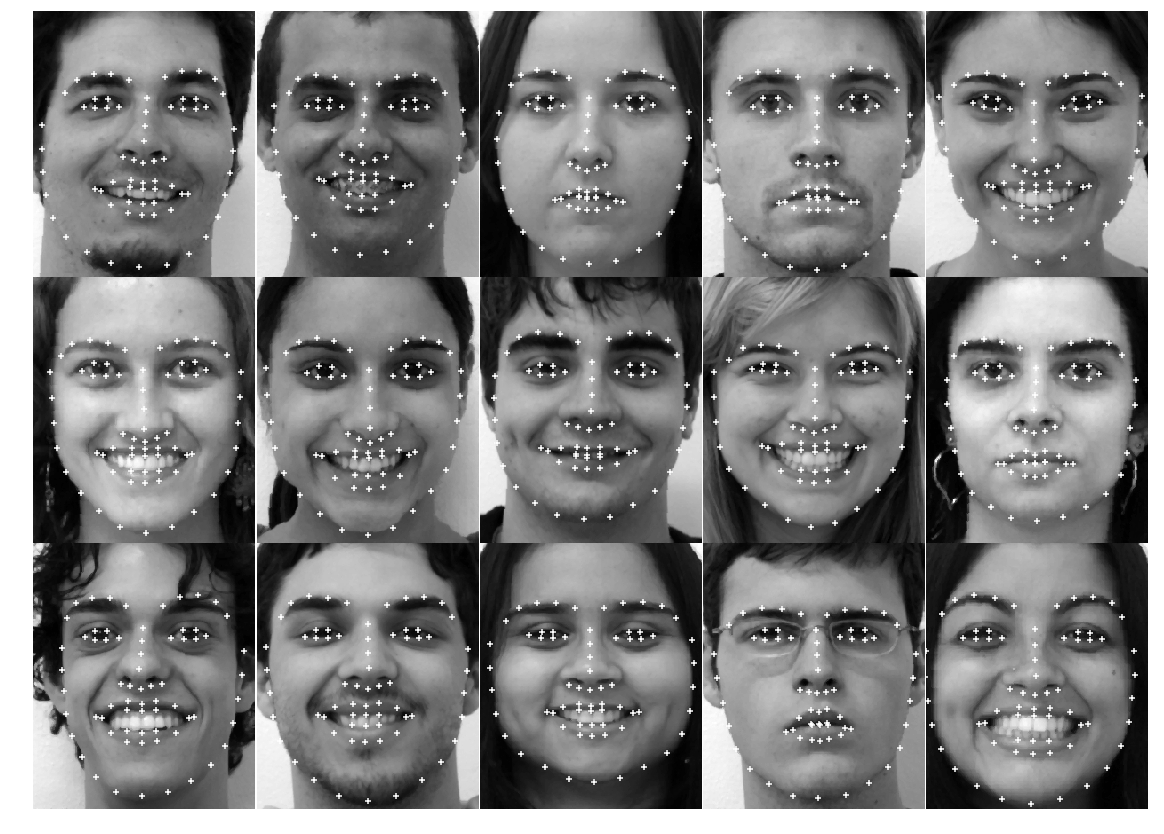

In [6]:
np.random.seed(1)
fig = plt.figure(figsize=(20.,14.7))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(15):
    k = np.random.randint(0,face_db.shape[0])
    plt.subplot(3,5,i+1)
    plot_landmarks(face_db[k],landmarks_db[k])